# 기계학습 (60점)

### 커머스 앱데이터
dataurl =https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m1.csv

데이터는 커머스 앱의 유저 로그에 관한 데이터이다.      
timestamp : event 발생시각    
event : 로그의 이벤트 명
- first_visit : 첫방문, 첫 방문시에는 구매를 하지 않는다
- visit : 앱방문
- visit_and_purchase : 앱방문 및 제품 구매     

params : 이벤트 상세
- source : 첫방문 유입 소스를 의미한다. search : 단순 검색 / promotion : 마케팅 / sns : sns유입
- product : 구매 제품   

age: 유저 나이    
gender : 유저 성별

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m1.csv')
df.head()

,user_id,timestamp,event,params,age,gender
0,668300627f964509a7f5b5f63b570d55,2024-02-18,first_visit,{'source': 'sns'},31,M
1,668300627f964509a7f5b5f63b570d55,2024-03-04,visit,NaN,31,M
2,668300627f964509a7f5b5f63b570d55,2024-03-16,visit,NaN,31,M
3,668300627f964509a7f5b5f63b570d55,2024-03-30,visit,NaN,31,M
4,668300627f964509a7f5b5f63b570d55,2024-04-26,visit_and_purchase,{'product': 'Clothing'},31,M


### 기계학습1
시각화를 포함한 데이터 EDA

In [2]:
df.isnull().sum()

user_id          0
timestamp        0
event            0
params       36113
age              0
gender           0
dtype: int64

In [3]:
df.describe(include='object')

,user_id,timestamp,event,params,gender
count,68175,68175,68175,32062,68175
unique,7431,366,3,13,2
top,cf7457d70960492884080d705c12fd1f,2024-04-21,visit,{'source': 'promotion'},M
freq,24,299,36113,3492,34330


In [4]:
df['params_dic'] = df['params'].fillna('{}').map(eval)

In [5]:
df.params_dic.map(lambda x : x.keys()).value_counts()

()           36113
(product)    24631
(source)      7431
Name: params_dic, dtype: int64

In [6]:
df['source'] = df['params_dic'].str['source']
df['product'] = df['params_dic'].str['product']

In [7]:
df['product'].value_counts()

Beauty Products    2530
Groceries          2519
Sports             2487
Clothing           2479
Electronics        2465
Books              2449
Movies & TV        2437
Toys               2436
Home & Kitchen     2433
Music              2396
Name: product, dtype: int64

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp']) 

In [9]:
df.timestamp.min(),df.timestamp.max()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-12-31 00:00:00'))

In [10]:
df['month'] = df.timestamp.dt.month

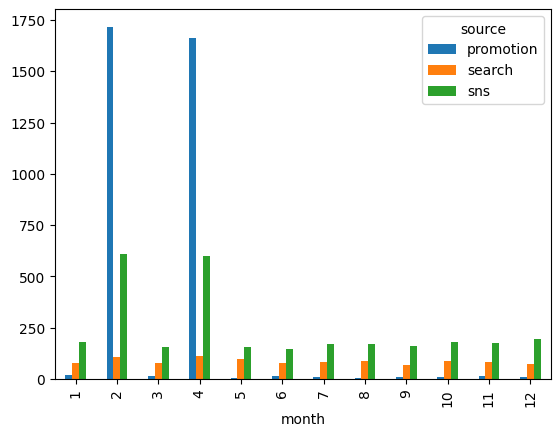

In [11]:
df.query("event =='first_visit'").groupby(['month','source']).size().unstack().plot(kind='bar')
plt.show()

### 기계학습2
유저의 7일차 31일차 앱 재방문율(리텐션)을 구하라.  

(추가설명)   
리텐션은 최초 앱방문일자를 기준으로 몇일 차 후에 또다시 방문했는지를    
전체 유저에 대해 데이터를 구하고 0일차 방문 횟수로 나누어 비율을 구한 값이다.   
- 아래와 같이 전체 일자에 대한 리텐션 결과를 구할 수 있다
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m2_img.png) 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retention-proportion</th>
    </tr>
    <tr>
      <th>day</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>100.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>69.519580</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.264971</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.251514</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.318800</td>
    </tr>
  </tbody>
</table>

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [20]:
first = df[df.event =='first_visit'][['user_id','timestamp']].rename(columns ={'timestamp':'first_visit_time'}).reset_index(drop=True)

In [23]:
m = pd.merge(df[['user_id','timestamp']],first)
m['delt'] = (m['timestamp'] -m['first_visit_time'] ).dt.days

In [24]:
g = (m.delt.value_counts().sort_index() /7431 * 100)

In [32]:
g[7],g[31]

(1.9916565738124077, 2.8798277486206434)

### 기계학습3     
가입일 포함 첫 31일 동안의 유저 행동을 통해 32일째 부터 7일동안의 물건 구매 여부를 확인하는 모델링을 진행하려고 한다.     
이를 위한 전처리를 진행하라. 
- 유저별 가입 후 한달 동안의 메타정보에 대한 테이블 (자율구성)    
- 종속 변수 : 가입 후 한달 후 일주일 동안 물건 구매 여부 (0,1)

In [39]:
variables[variables.event =='visit_and_purchase'].user_id.value_counts().to_frame().reset_index()

,index,user_id
0,d946b67c899e4863afde979e581e6cb1,4
1,b863bcb3866c4b0fb0a80f15d60bfb58,4
2,c141521cca514cc189ff6f0d06d9db62,4
3,e0fadee18e83424a94bb69cbdc82a68f,3
4,b7aa74a672a0406bb43590c8c40828a8,3
...,...,...
3365,48e18dcd44194c7988eeb90a5ba27db1,1
3366,f9dcbf2898a64890af6484e59205970b,1
3367,446f3150bdf0427c81703d5cf176d6cc,1
3368,e430589d780745ffa6ad625b9fbc0841,1


In [45]:
import datetime

pd.to_datetime('2024-12-31')  - datetime.timedelta(days =38)

model_user = df[(df.event =='first_visit') & (df.timestamp <= pd.to_datetime('2024-11-23'))].user_id
model_df = df[df.user_id.isin(model_user)].reset_index(drop=True)

merges = pd.merge(model_df,first,on='user_id')

merges['del_day']  = (merges['timestamp'] - merges['first_visit_time']).dt.days

variables = merges[merges.del_day <=30].reset_index(drop=True)
target = merges[(merges.del_day >=31) & (merges.del_day <=37)].reset_index(drop=True)

# 유저별 유입소스, 나이, 성별 첫 유일 월
df1 = variables[variables.event =='first_visit'][['user_id','source','month','age','gender']].reset_index(drop=True)

# 총 구매 횟수
df2= variables[variables.event =='visit_and_purchase'].user_id.value_counts().to_frame().reset_index()
df2.columns =['user_id','total_purchase_counts']

# 각 물품별 구매 횟수
df3 = variables[variables.event =='visit_and_purchase'].groupby(['user_id','product']).size().unstack().fillna(0).astype('int').reset_index()

# 총 방문 횟수
df4 = variables[variables.event =='visit'].user_id.value_counts().to_frame().reset_index()
df4.columns =['user_id','only_visit_counts']

# 종속변수 : 1주일 후 구매여부

mer1 = pd.merge(df1,df2,how='outer',on='user_id')
mer2 = pd.merge(mer1,df3,how='outer',on='user_id')
mer3 = pd.merge(mer2,df4,how='outer',on='user_id')

mer3 = mer3.fillna(0)

target_df = target.groupby(['user_id','event']).size().unstack()['visit_and_purchase'].fillna(0).map(lambda x : 1 if x>=1 else 0).\
                        reset_index().rename(columns ={'visit_and_purchase':'target_y'})

total_df = pd.merge(mer3,target_df,how='outer',on='user_id')
total_df['target_y'] =total_df['target_y'].fillna(0).astype('int')
total_df

,user_id,source,month,age,gender,total_purchase_counts,Beauty Products,Books,Clothing,Electronics,Groceries,Home & Kitchen,Movies & TV,Music,Sports,Toys,only_visit_counts,target_y
0,668300627f964509a7f5b5f63b570d55,sns,2,31,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
1,5247c14484884949b5aa036cc68219f5,sns,7,47,M,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,3e2b6f742974459eba9d3aaa22f6da9c,sns,4,32,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
3,c62378d501044b3c9b5e68b2b5dbbb4a,promotion,2,52,M,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,69f1e22b04c545dfa4f64bc3e8755846,search,2,31,M,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,b7fe3798f0c0486193c698e02ecf5606,promotion,2,29,M,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
7099,3557834b29194797b9caeed6b785b888,sns,5,44,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
7100,f979891515c142aaa26255048ffbf550,sns,4,53,F,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
7101,05620b2979d242e6a50a6cf5484b51fd,promotion,4,27,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


### 기계학습4     
2개의 분류 모델을 통해 학습을 진행하고 모델 평가를 진행하라    
유의미한 변수를 추출하라

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
x = total_df.drop(columns =['user_id','target_y'])
y = total_df['target_y']
x_dum = pd.get_dummies(x)

In [54]:
X_train, X_test, y_train, y_test =  train_test_split(x_dum,y,test_size =0.3,stratify=y)

In [55]:
rf = RandomForestClassifier(random_state=1)
det = DecisionTreeClassifier(random_state=1)

rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

det.fit(X_train,y_train)
pred_det = det.predict(X_test)

accuracy_score(y_test,pred_rf) ,accuracy_score(y_test,pred_det)

(0.8962928202721727, 0.8526513374002815)

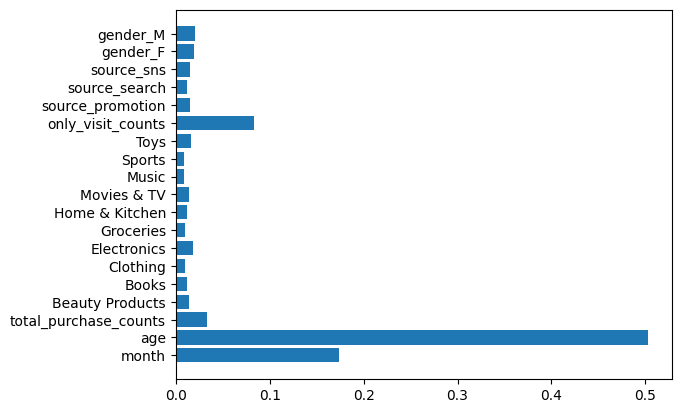

In [56]:
plt.barh(X_train.columns,rf.feature_importances_)
plt.show()

### 기계학습5     
모델 성능 개선을 위해 추가로 필요한 데이터를 개발팀에 요청하려한다.   
필요항목과 해당 항목을 요청하는 이유를 서술하라     

유저 접속시간, 판매 물품의 금액

### 비트코인 가격 데이터   
dataurl =https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m2.csv

데이터는 커머스 앱의 유저 로그에 관한 데이터이다.      
연속적인 데이터다     
TIMESTAMP : timestamp
bitcoin($) : 비트코인가격(달러)


In [57]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m2.csv')
df.head()

,TIMESTAMP,bitcoin($)
0,1.577837e+09,7195.24
1,1.577837e+09,7187.67
2,1.577837e+09,7184.41
3,1.577837e+09,7183.83
4,1.577837e+09,7185.54


### 기계학습5    
결측치 대치 방법에 대해 논의하고 적절한 방법으로 주어진 데이터의 결측치를 처리하라       

In [58]:
df.isnull().sum()

TIMESTAMP     341
bitcoin($)     23
dtype: int64

In [59]:
df.TIMESTAMP.diff(1).value_counts()

60.0    44330
Name: TIMESTAMP, dtype: int64

In [60]:
# TIMESTAMP 차분값이 60으로 동일하므로 60의 간격으로 결측치를 채운다. 

for idx in df[df.TIMESTAMP.isnull()].index:
    
    pre_value = df.loc[idx-1, 'TIMESTAMP']
    after_value = pre_value + 60
    df.loc[idx, 'TIMESTAMP'] =after_value

In [61]:
# 선형보간으로 결측치 채운다
df['bitcoin($)'] = df['bitcoin($)'].interpolate()

In [62]:
df.isnull().sum()

TIMESTAMP     0
bitcoin($)    0
dtype: int64

### 기계학습6     
데이터의 정상성을 통계적, 시각적 방법을 통해 확인하라.     

In [63]:
df['date'] = pd.to_datetime(df['TIMESTAMP'],unit='s')
df = df.rename(columns ={'bitcoin($)':'price'})

In [64]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
# adfuller
# 귀무가설 : 비정상 / 대립가설 : 정상

# kpssb
# 귀무가설 : 정상 / 대립가설 : 비정상


result = adfuller(df['price'])
print(result[1])

0.691187540726947


In [66]:
result = adfuller(df['price'].diff(1).dropna())
print(result[1])

0.0


In [67]:
w = df.copy()

In [68]:
w['price_diff'] = w['price'].diff(1)

In [69]:
import matplotlib.pyplot as plt

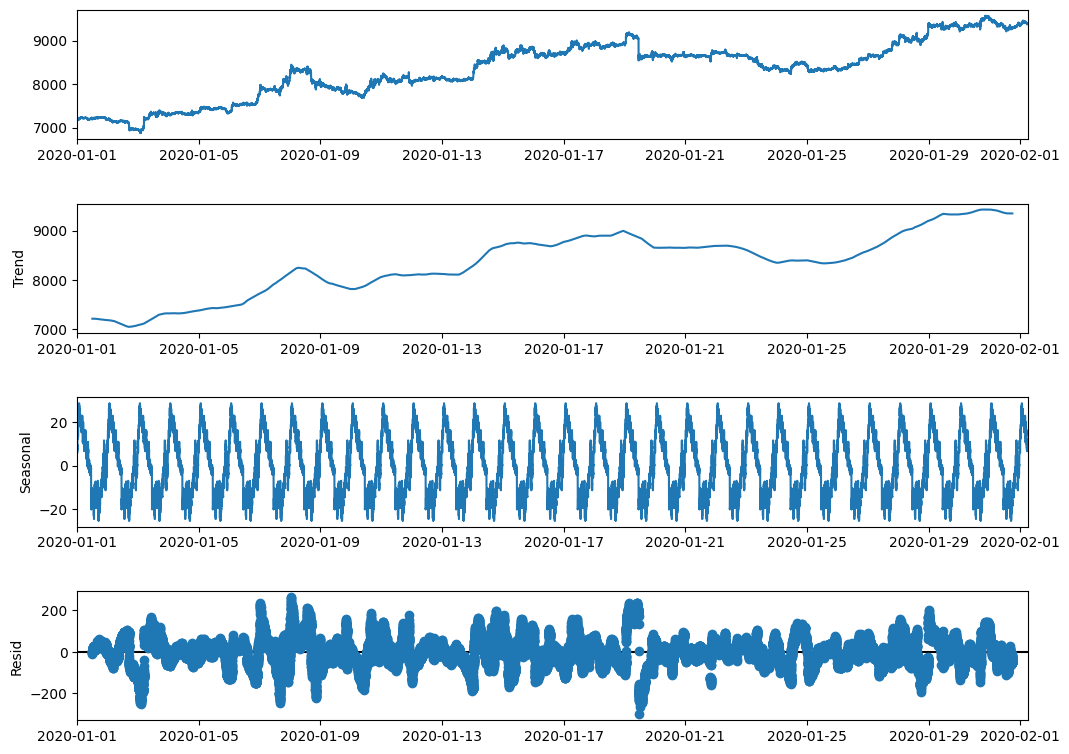

In [70]:
result = seasonal_decompose(w[['date','price']].set_index('date'), model='additive', period=1440)

fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

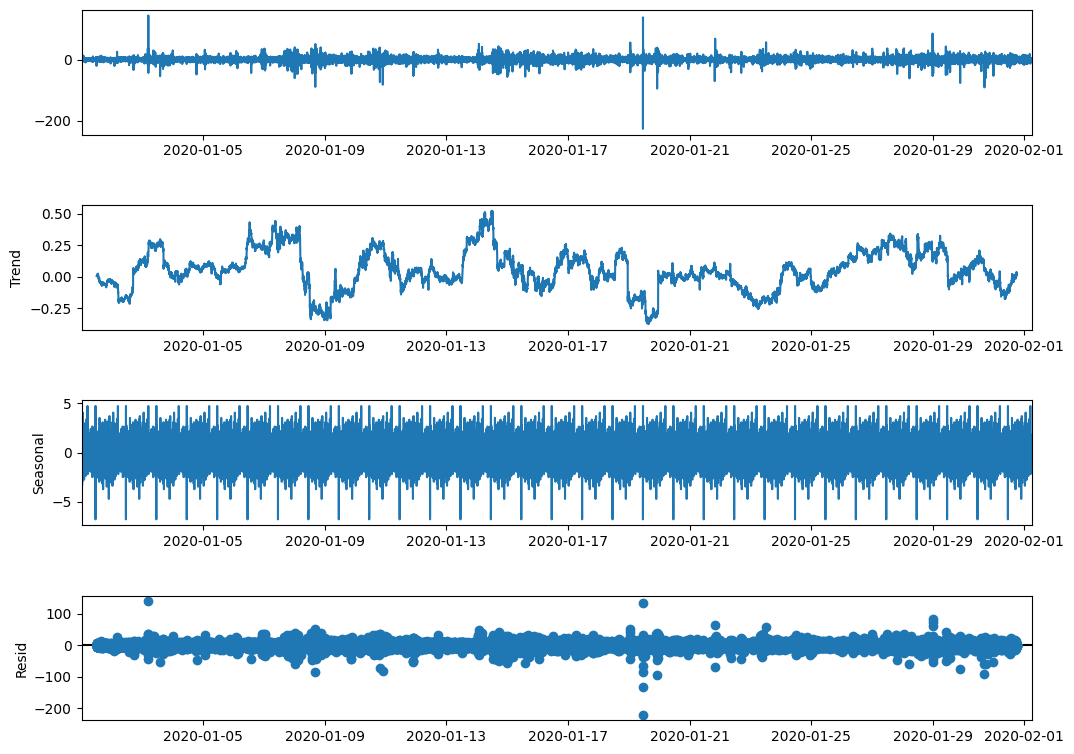

In [71]:
result = seasonal_decompose(w[['date','price_diff']].set_index('date').dropna(), model='additive', period=1440)

fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

### 기계학습7     
ARIMA 모델을 통해 모델링을 진행하고 평가하라. (p,d,q) 파라미터의 적정값을 선정한 이유를 서술하라   
(2020년 2월 6시간 동안의 데이터를 평가용 데이터로 한다)

In [72]:
train = df[df['date'].dt.month ==1].reset_index(drop=True).set_index('date')['price'][-360:]
test = df[df['date'].dt.month ==2].reset_index(drop=True).set_index('date')['price']

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


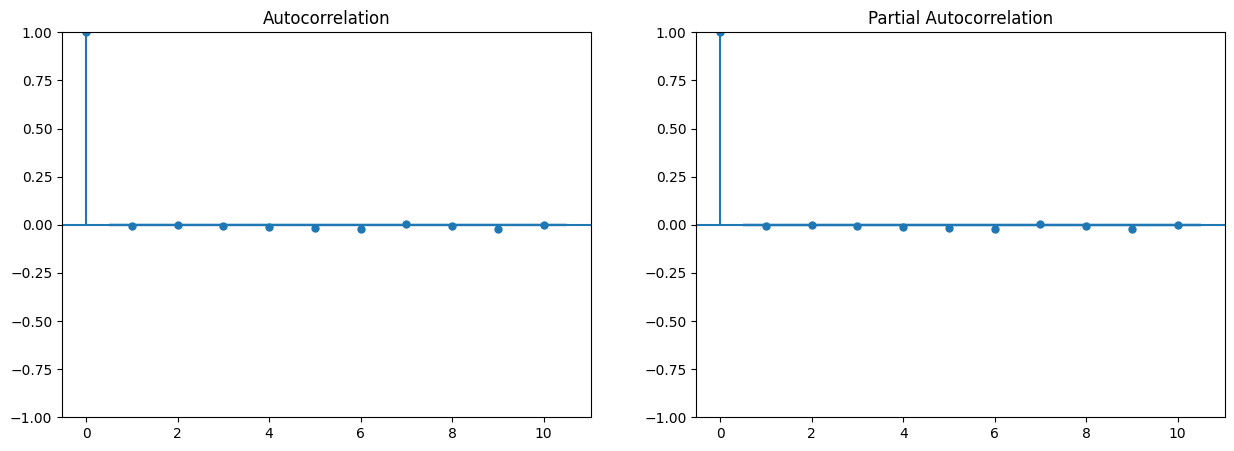

In [74]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

plot_acf(df['price'].diff(1).dropna(), ax=ax[0], lags=10)
plot_pacf(df['price'].diff(1).dropna(), ax=ax[1], lags=10)
plt.show()

차분한 데이터로 acf , pacf를 확인 유의미하게 0이 아닌 마지막 래그는 모두 0이므로 p=0,q=0으로 선정

In [75]:
from statsmodels.graphics.tsaplots import plot_predict

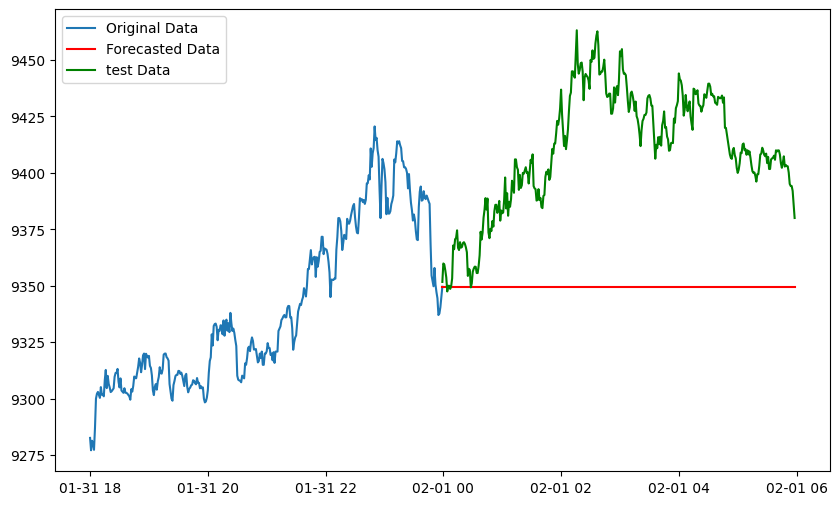

In [76]:
train = df[df['date'].dt.month ==1].reset_index(drop=True).set_index('date')['price']
test = df[df['date'].dt.month ==2].reset_index(drop=True).set_index('date')['price']

train.index = pd.DatetimeIndex(train.index).to_period('T')
test.index =pd.DatetimeIndex(test.index).to_period('T')

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0, 1, 0),freq='T')
model_fit = model.fit()
forecast = model_fit.forecast(steps=360)

plt.figure(figsize=(10, 6))
plt.plot(train.tail(360).to_timestamp(), label='Original Data')

forecast_index = pd.date_range(start=train.index[-1].to_timestamp(), periods=360, freq='T')


plt.plot(forecast_index, forecast, color='red', label='Forecasted Data')
plt.plot(forecast_index, test.values, color='green', label='test Data')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
mean_squared_error(test.values,forecast.values)

4405.241477777814

# 통계 (40점)

### 통계1      
자동차 A,B,C에 대해 유저 9명의 선호도(1~6, 6은 가장선호,1은 가장 비선호)를 표시했다.    
자동차 간의 선호도 차이가 존재하는지 검정하라     

<table>
<tr>
    <th></th>
    <td>차량 A</td>
    <td>차량 B</td> 
    <td>차량 C</td>  
</tr>

<tr>
    <td>피험자1</td> 
    <td>4</td> 
    <td>1</td>
    <td>6</td>
</tr>
<tr>
    <td>피험자2</td> 
    <td>3</td> 
    <td>4</td>
    <td>6</td>
</tr>
<tr>
    <td>피험자3</td> 
    <td>2</td> 
    <td>4</td>
    <td>6</td>
</tr>
    <tr>
    <td>피험자4</td> 
    <td>4</td> 
    <td>3</td>
    <td>2</td>
</tr>
    <tr>
    <td>피험자5</td> 
    <td>4</td> 
    <td>1</td>
    <td>6</td>
</tr>
    <tr>
    <td>피험자6</td> 
    <td>6</td> 
    <td>4</td>
    <td>2</td>
</tr>
    <tr>
    <td>피험자7</td> 
    <td>5</td> 
    <td>3</td>
    <td>5</td>
</tr>
    <tr>
    <td>피험자8</td> 
    <td>6</td> 
    <td>3</td>
    <td>2</td>
</tr>
    <tr>
    <td>피험자9</td> 
    <td>2</td> 
    <td>4</td>
    <td>6</td>
</tr>
</table>  

(1) 가설설정     
(2) 검정 통계량 확인 및 가설검정

In [79]:
from scipy.stats import friedmanchisquare
import numpy as np
s,p = friedmanchisquare([4,3,2,4,4,6,5,6,2],[1,4,4,3,1,4,3,3,4],[6,6,6,2,6,2,5,2,6])
print(s,p)

1.7714285714285634 0.4124194827001597


### 통계2
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_s2.csv
위 데이터는 영화관 이용객의 장르별 팝콘 구매여부에 관한 데이터이다.    
장르별 팝콘 구매 여부가 연관이 있는지 확인하고 싶다.    
(1) 가설설정, 가설 검증      
(2) 장르과 구매여부의 정량적인 상관정도를 구하고 분석하라    

In [80]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_s2.csv')
df.head()

,유저ID,장르,구매여부
0,0,액션,구매
1,1,액션,구매
2,2,액션,구매
3,3,액션,구매
4,4,액션,구매


In [81]:
from scipy.stats import chi2_contingency


In [82]:
result =chi2_contingency(pd.crosstab(df['장르'],df['구매여부']))
print(result[1])

4.987377462630171e-14


In [83]:
from scipy.stats.contingency import association

v = association(pd.crosstab(df['장르'],df['구매여부']), method='cramer',)
print(v)



0.32916973606033734


In [84]:
data = pd.crosstab(df['장르'],df['구매여부'])
chi2, p, dof, expected = chi2_contingency(data)

# 크라메르 연관계수 계산
n = np.sum(data).sum() # 총 관측치 수
min_dim = min(data.shape)-1  # 열과 행 중 더 작은 값에서 1을 뺀 값
V = np.sqrt((chi2/n) / min_dim)

print("크라메르 연관계수 V:", V)


크라메르 연관계수 V: 0.32916973606033734


0.6이상 강력하게 연관
0.2~ 0.6 적당하게 연관

### 통계 3     
어느 도시에서 성인 전체의 25%가 흡연자라고 한다. 만약 현재도 이와 비슷한 비율이 유지된다면 1300명의 성인표본에서 흡연자가 317명보다 작을 확률은 얼마인가?

In [85]:
from scipy.stats import norm
p = 0.25 
n = 1300 
x = 317  

mu = p
sigma = (p * (1 - p) / n) ** 0.5
p_x = x / n
prob = norm.cdf(p_x, mu, sigma)
prob


0.30418201463044886

### 통계 4     
어떤 앱 개발 회사가 새로운 게임을 출시했다. 사용자가 게임 내에서 특정 퀘스트를 클리어하는 성공 확률이 0.3이라고 한다.    
(1) 사용자가 총 3회의 성공을 하기까지 시도한 횟수가 5회 미만일 확률은 얼마인가?         
(2) 사용자가 4번의 퀘스트 클리어 성공을 경험하기까지 평균적으로 몇 번의 시도를 하는가?    

In [86]:
from scipy.stats import nbinom

p = 0.3  
s = 3   
prob_1 = nbinom.cdf(1,s, p) 

rv = nbinom(4,0.3)
exp = rv.mean() + 4  #  4/0.3

prob_1, exp



(0.0837, 13.333333333333334)

### 통계5    
데이터는 년도별 플로리다에서 발생한 상어 공격 횟수와 해당 연도의 인구수이다. 
일반화선형모형을 이용하여 년도별 인구에 따른 상어공격 수에 대한 모델링을 진행하라
(포아송 분포를 고려하여 모델링을 하고 오프셋은 인구를 1000으로 나눈 후 로그를 씌운값으로 진행하라.)   
(1) 모델링 후 모델에 대한 분석을 진행하라.(시각화포함)     
(2) 2000년도에 인구가 16224544라고 할 때 상어 공격횟수를 예측한 값을 출력하라    

In [87]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_s5.csv')

In [88]:
df['Population'] = np.log(df['Population']/1000)

In [89]:
X = df[['Year']]
X = sm.add_constant(X)
Y = df['Attacks']


poission_model = sm.GLM(Y, X,offset = df['Population'], family=sm.families.Poisson())
result = poission_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Attacks   No. Observations:                   54
Model:                            GLM   Df Residuals:                       52
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -142.38
Date:                Thu, 19 Sep 2024   Deviance:                       119.11
Time:                        20:19:58   Pearson chi2:                     118.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.6573
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.8845      8.658     -7.956      0.000     -85.854     -51.915
Year           0.0312      0.004      7.148      0.000       0.023       0.040
==============================================================================
"""

In [90]:
result.predict([1,2000],offset = np.log(16224544/1000))

array([23.51581604])